In [94]:
from __future__ import division
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *
from code.survey_processor_full import *

import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
sv = survey('data/survey_full/')

In [79]:
sv.rough_process()

In [80]:
df = sv.data.copy()

In [13]:
dictn = extr_val_labels('data/survey_full/GSS.sps')

In [81]:
df.chldidel.value_counts()

Not applicable     1900
2                  1256
3                   663
4                   258
As many as want     234
1                    66
Dk,na                65
5                    34
6                    16
0                    15
Seven+                6
Name: chldidel, dtype: int64

In [21]:
bs = ['Not applicable', "Don't know",'No answer',"Dk,na","As many as want",'Seven+']

In [37]:
bsdict = {'Not applicable':94,"Don't know":95, 'No answer':96, 'Dk, na':97, "As many as want": 98,'Seven+':99}

In [40]:
bsdict_re = {k:v for (v,k) in bsdict.iteritems()}

In [41]:
bsdict_re

{94: 'Not applicable',
 95: "Don't know",
 96: 'No answer',
 97: 'Dk, na',
 98: 'As many as want',
 99: 'Seven+'}

In [42]:
a = df.chldidel.replace(bs,[98,97,96,95,94,93])

In [82]:
def flag(df,colis,bs):
    for c in colis:
        for b in bs:
            df[c+'_'+b]= df[c].apply(lambda x:x==b)
        df[c].replace(bs,[98,97,96,95,94,93],inplace = True)

In [84]:
flag(df,['age','chldidel'],bs)

In [87]:
df.coninc.isnull().sum()

0

In [35]:
check_impute(df,['sphrs1','maeduc','paeduc','agekdbrn','speduc','chldidel'],df.employed,bs)

defaultdict(float,
            {'agekdbrn': 0.56568180314725214,
             'chldidel': 0.21698770127545408,
             'maeduc': 7.7079134481375635e-08,
             'paeduc': 0.0088678751895869198,
             'speduc': 0.0094026907089101337,
             'sphrs1': 0.1574523575855464})

In [39]:
df.describe()

,coninc,employed
count,4513.000000,4513
mean,42777.698550,0.643474
std,40261.789599,0.479026
min,0.000000,False
25%,13377.000000,0
50%,32273.000000,1
75%,60967.500000,1
max,178712.464940,True


In [2]:
df = pd.DataFrame({'a':[1,2,3],'b':[3.4,6.5,4.7]})

In [117]:
sv = survey('data/survey_full/')

In [118]:
sv.num_processor()

In [119]:
dff = sv.fin_data

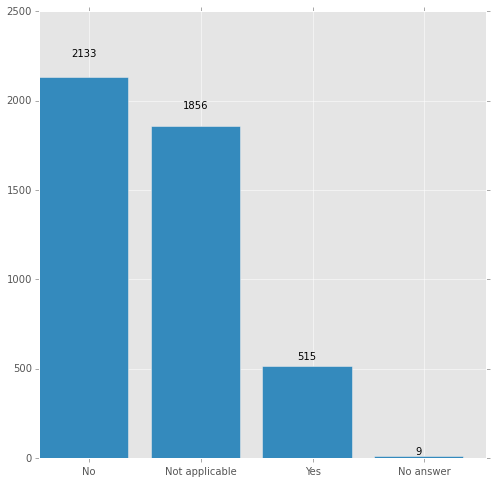

In [129]:
simple_bar(df.divorce)